# Creando el primer gráfico con Seaborn

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data/Inmigrantes_Canadá.csv")
df.set_index("Pais", inplace=True)

In [11]:
import seaborn as sns

In [12]:
# configurar un tema por defecto para todas las gráficas que se vayan a crear
sns.set_theme()

## Revisando datos globales históricos de inmigración a Canadá

In [13]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Region,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Pais,,,,,,,,,,,,,,,,,,,,,
India,Asia,Sur de Asia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Asia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido,Europa,Norte de Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Asia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistán,Asia,Sur de Asia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos,América del Norte,América del Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irán,Asia,Sur de Asia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Sur de Asia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Corea del Sur,Asia,Asia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


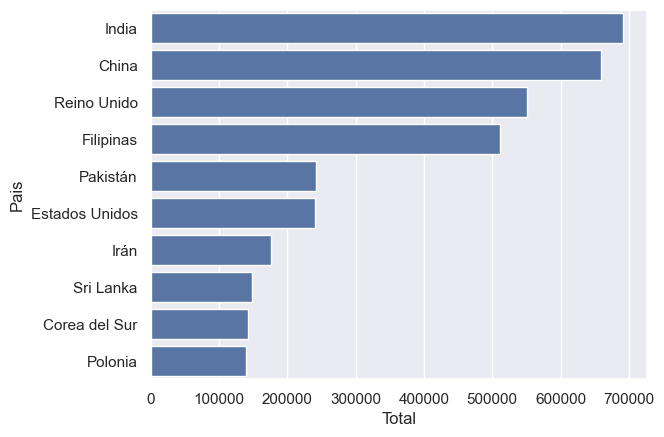

In [9]:
# gráfico de barras
sns.barplot(data=top_10, x='Total', y=top_10.index, orient='h')

# seaborn está construido a base de Matplotlib, por lo que comparten algunos comandos 
plt.show()

# Personalizando visualizaciones con Seaborn

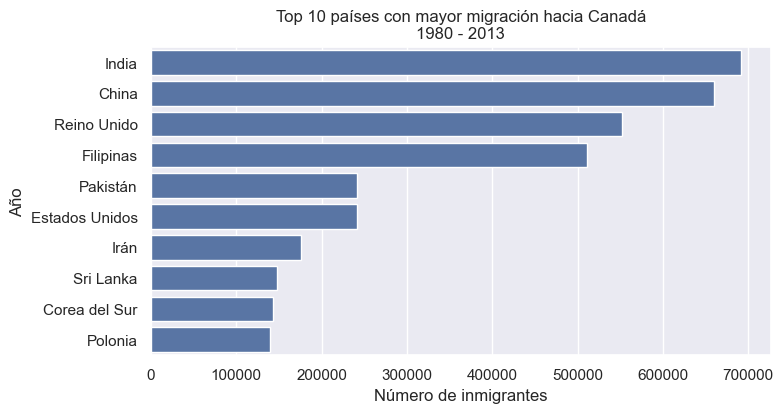

In [15]:

fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=top_10, x="Total", y=top_10.index, orient="h")
ax.set(title='Top 10 países con mayor migración hacia Canadá\n1980 - 2013', xlabel='Número de inmigrantes', ylabel='Año')

plt.show()

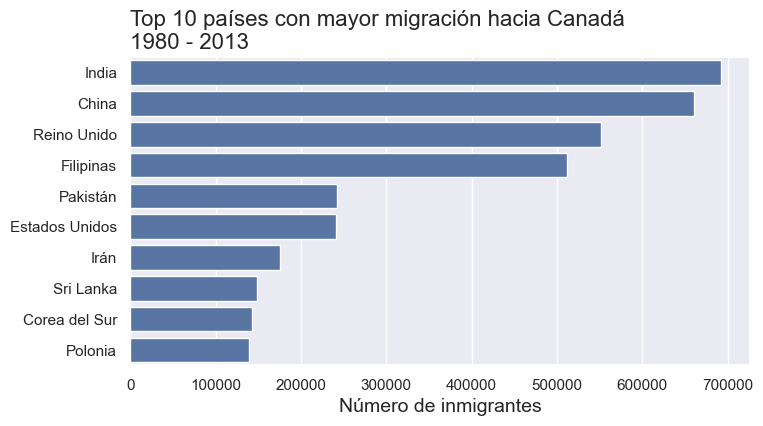

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(data=top_10, x="Total", y=top_10.index, orient="h")
ax.set_title("Top 10 países con mayor migración hacia Canadá\n1980 - 2013", loc='left', fontsize=16)
ax.set_xlabel('Número de inmigrantes', fontsize=14)
ax.set_ylabel('')

plt.show()

# Utilizando diversas paletas de color

In [43]:
# función para probar distintas paletas de color
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    # limpieza de deetalles innecesarios
    ax.set_frame_on(False)
    ax.xaxis.set_visible(False)
    ax.tick_params(axis='y', which='both', size=0)
    
    ax = sns.barplot(data=top_10, x="Total", y=top_10.index, hue=top_10.index, orient="h", palette=palette, legend=False)
    ax.set_title(
        "Top 10 países con mayor migración hacia Canadá\n1980 - 2013",
        loc="left",
        fontsize=16,
    )
    ax.set_xlabel("Número de inmigrantes", fontsize=14)
    ax.set_ylabel("")
    
    
    for i,j in enumerate(top_10['Total']):
        ax.text(j+20, i, str(j), color='black', fontsize=9, ha='left', va='center')

    plt.show()

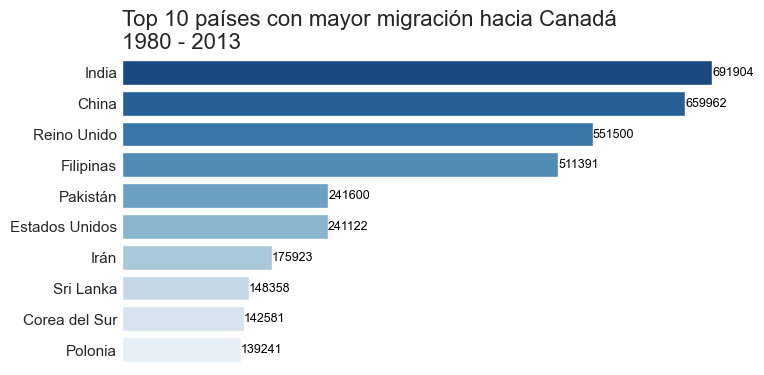

In [44]:
# Blues_r es la paleta reversa
generar_grafico('Blues_r')

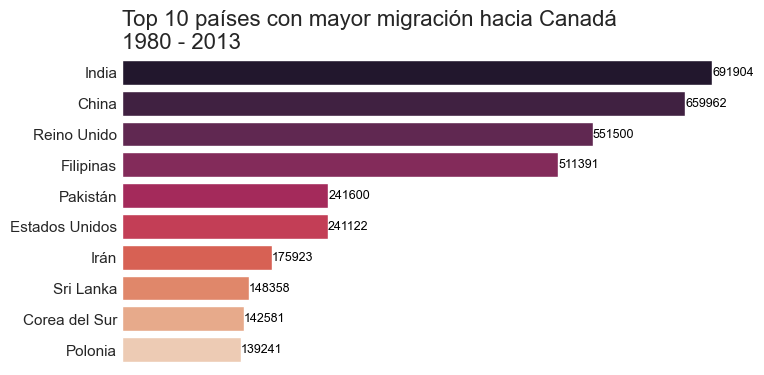

In [45]:
generar_grafico('rocket')

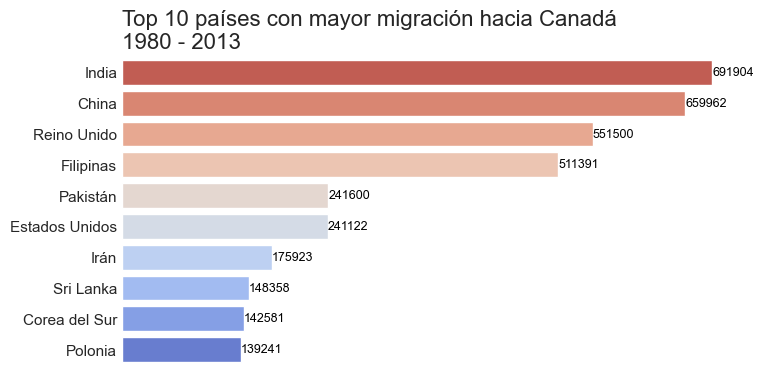

In [46]:
generar_grafico('coolwarm_r')
# este tipo de paletas son útiles cuando se presenta una desviación de un valor central. En este caso no tendría sentido su uso y podría ser engañosa.

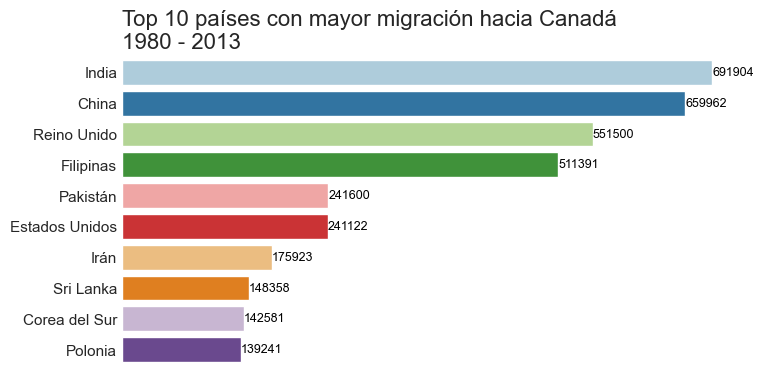

In [47]:
# Para estos casos conviene más una paleta categórica
generar_grafico('Paired')

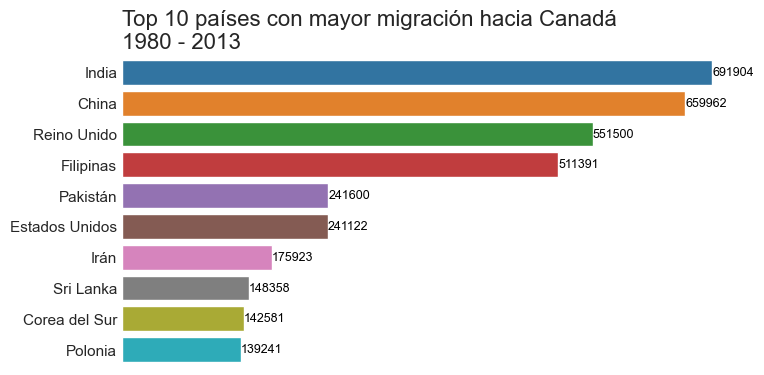

In [48]:
generar_grafico('tab10')

# Explorando otros temas
Al momento de modificar los parámetros de matplotlib estos se sobrepusieron a los de Seaborn. Será necesario refactorizar.

In [64]:
# función para probar distintas paletas de color
def generar_grafico(palette):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Limpiando detalles innecesarios
    ax.set(xticklabels=[])

    ax = sns.barplot(
        data=top_10,
        x="Total",
        y=top_10.index,
        hue=top_10.index,
        orient="h",
        palette=palette,
        legend=False,
    )
    ax.set_title(
        "Top 10 países con mayor migración hacia Canadá\n1980 - 2013",
        loc="left",
        fontsize=16,
    )
    ax.set_xlabel("Número de inmigrantes", fontsize=14)
    ax.set_ylabel("")
    # quitar borde al gráfico
    sns.despine()

    for i, j in enumerate(top_10["Total"]):
        ax.text(j + 20, i, str(j), color="black", fontsize=9, ha="left", va="center")

    plt.show()

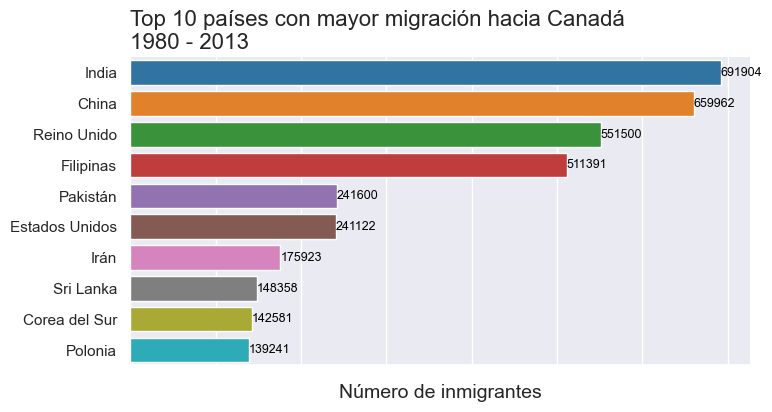

In [65]:
# cambiando fondo
sns.set_theme() # default
generar_grafico("tab10")

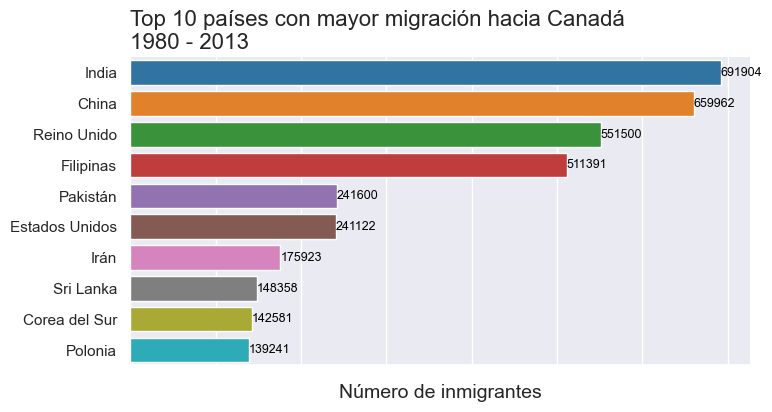

In [66]:
# cambiando fondo
sns.set_theme(style='darkgrid')
generar_grafico("tab10")

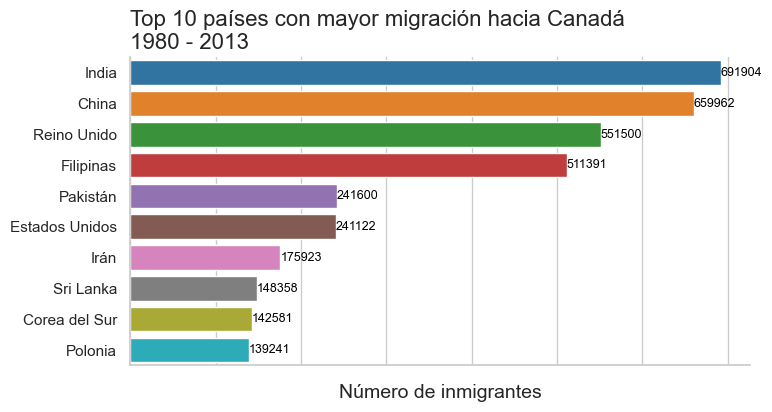

In [67]:
# cambiando fondo
sns.set_theme(style='whitegrid')
generar_grafico("tab10")

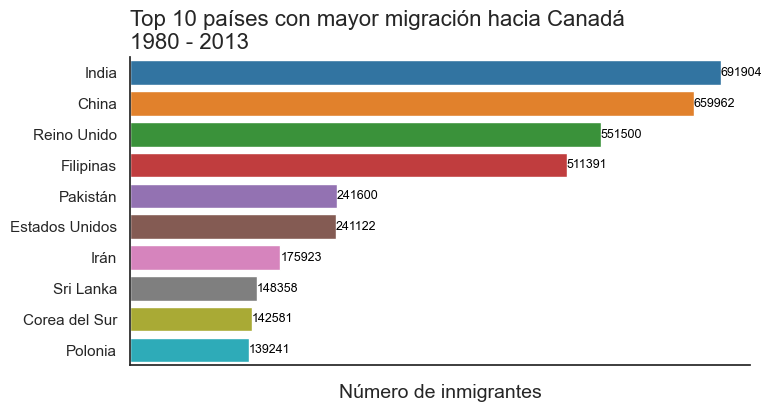

In [68]:
# cambiando fondo
sns.set_theme(style="white")
generar_grafico("tab10")